# Projeto Reconhecimento de Dígitos Manuscritos

## Etapas:

- **Carregar Dados:** Importamos o dataset MNIST para separá-lo em conjuntos de treino e teste.
- **Definir Modelo Keras:** Construímos uma rede neural utilizando a API sequencial do Keras.
- **Compilar Modelo Keras:** Configuramos o modelo com otimizador, função de perda e métricas.
- **Ajustar (Fit) Modelo Keras:** Treinamos o modelo nos dados de treinamento e monitoramos o desempenho no conjunto de validação.
- **Avaliar (Evaluate) Modelo Keras:** Calculamos a perda e a acurácia no conjunto de teste.
- **Fazer Previsões (Predict):** Realizamos predições no conjunto de teste e em dados externos para avaliar a capacidade de generalização.

## Análise dos Resultados e Overfitting
Com base nos gráficos e na avaliação do modelo em diferentes conjuntos de dados, algumas observações importantes podem ser feitas:

### 1. Overfitting Detectado
Os gráficos de `loss` e `val_loss` mostram que a perda no conjunto de treinamento continuou diminuindo enquanto a perda no conjunto de validação estabilizou e até começou a aumentar em determinado ponto. Isso é uma evidência clara de overfitting, o que significa que o modelo aprendeu muito bem os padrões específicos dos dados de treinamento, mas teve dificuldade em generalizar para os dados de validação.

### 2. Desempenho Inferior em Dados Externos
Ao testar o modelo com imagens externas (fora do MNIST), observou-se um desempenho inferior comparado ao conjunto de teste original. Este resultado destaca dois pontos importantes:

#### a. Diferença no Domínio dos Dados
As imagens externas podem ter características diferentes (como espessura dos traços, ruído ou estilo de escrita) em relação às imagens do MNIST. Como o modelo foi treinado apenas com dados do MNIST, ele pode não estar preparado para lidar com essas variações.

#### b. Normalização e Pré-Processamento
As imagens externas passaram por uma inversão de cores (`255 - img_array`) para alinhar com o MNIST, mas isso pode não ter sido suficiente. O formato, escala ou outras características das imagens externas podem ter causado discrepâncias no desempenho.

---

## Conclusão
O modelo apresentou bom desempenho nos dados do MNIST, mas demonstrou dificuldades para generalizar para dados externos, evidenciando problemas de overfitting.

## Etapa 1: Configuração Inicial
Configuramos o ambiente para garantir que a execução seja limpa e sem interferências de logs desnecessários.

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from src.config import PASTA_DADOS  # Importe as configurações do config.py


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
mnist = keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Usuario\\anaconda3\\envs\\projeto_mnist\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## Etapa 2: Carregamento do Dataset MNIST
Carregamos o dataset MNIST, que contém imagens de dígitos escritos à mão, separadas em conjuntos de treino e teste.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Etapa 3: Pré-Processamento e Visualização
Visualizamos algumas amostras do conjunto de treino para melhor compreensão dos dados.

In [6]:
type(x_train[0])

numpy.ndarray

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0][0].shape

(28,)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [13]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True)))
contagem

((0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949))

In [14]:
for par in contagem:
    print(f"{par[0]}: {par[1] / len(y_train) * 100:.2f}%")

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


- `matplotlib`: Utilizado para exibir imagens em escala de cinza do conjunto de treino.
- Exibimos os rótulos correspondentes às imagens para verificar a distribuição dos dados.

---


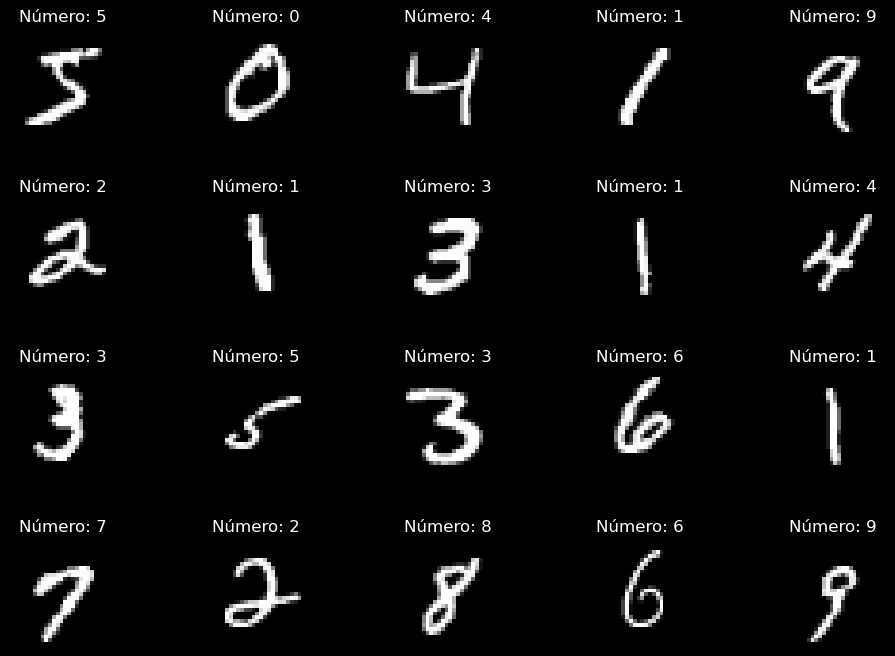

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.patch.set_facecolor('black')
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Número: {y_train[i]}", color="white")
    ax.axis("off")

fig.subplots_adjust(hspace=0.6)

plt.show()

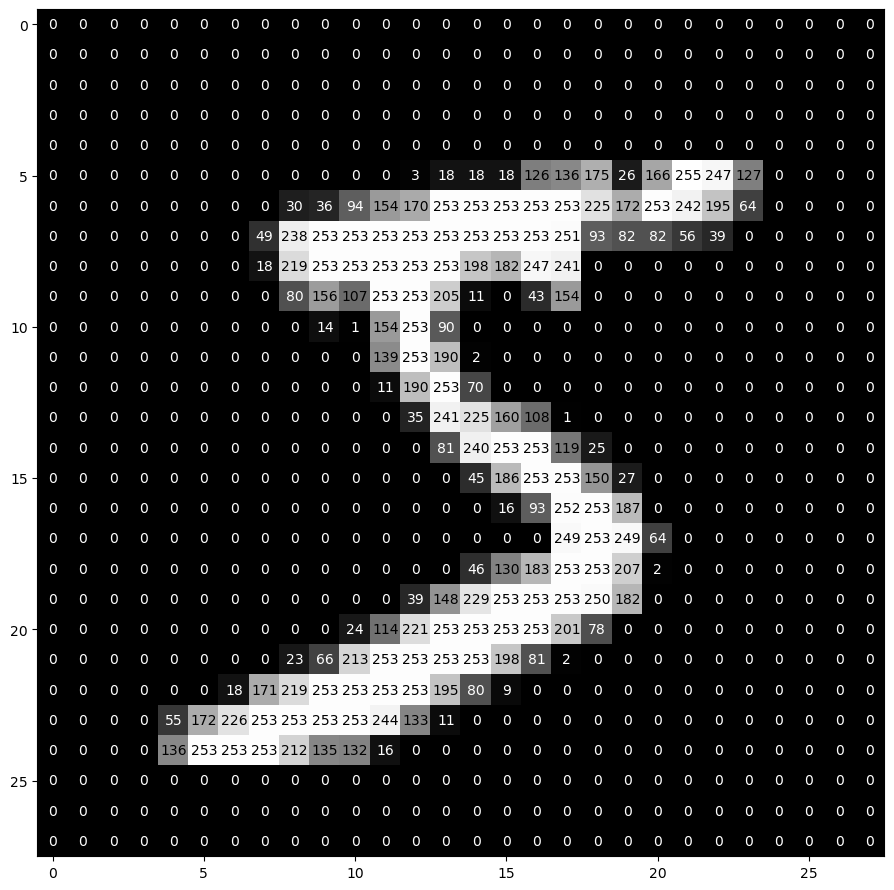

In [16]:
fig, ax = plt.subplots(figsize=(11, 11))


ax.imshow(x_train[0], cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna]
        ax.annotate(
            str(valor),
            xy=(coluna, linha),
            color="black" if valor > 100 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

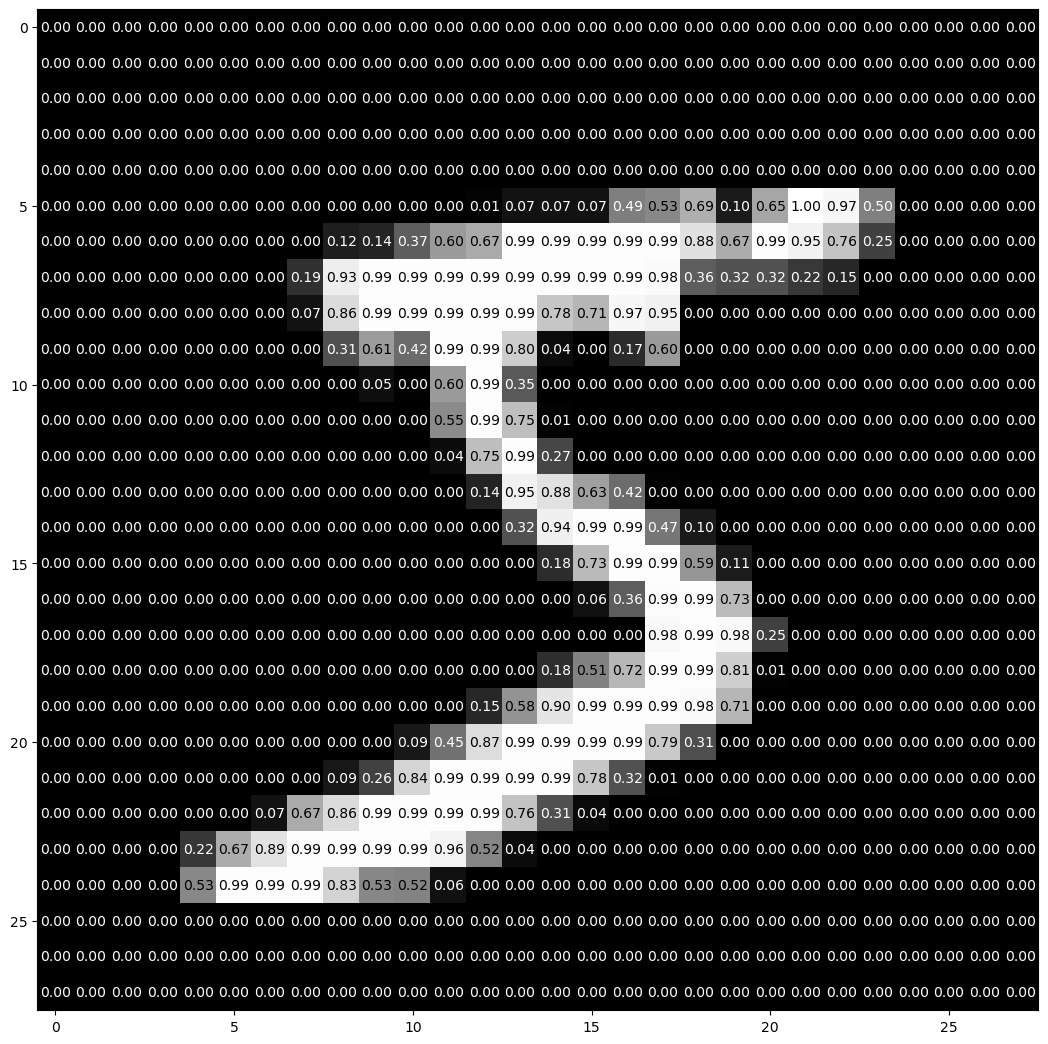

In [17]:
fig, ax = plt.subplots(figsize=(13, 13))


ax.imshow(x_train[0] / 255, cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna] / 255
        ax.annotate(
            f"{valor:.2f}",
            xy=(coluna, linha),
            color="black" if valor > 0.5 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

## Etapa 4: Construção do Modelo
Criamos uma rede neural sequencial para classificar os dígitos.

In [18]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28)))
model.add(keras.layers.Rescaling(scale=1./255))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________



- `InputLayer`: Define o formato de entrada como imagens de 28x28 pixels.
- `Rescaling`: Divide os valores dos pixels por 255 para transformá-los para a escala 0-1.
- `Flatten`: Converte as imagens bidimensionais em vetores unidimensionais.
- `Dense(128, activation="relu")`: Camada com 128 neurônios e ativação ReLU, ideal para aprendizado não linear.
- `Dense(10, activation="softmax")`: Camada de saída com 10 neurônios e ativação Softmax para classificação multiclasse.
---

## Etapa 5: Compilação do Modelo
Configuramos o modelo para o treinamento.

In [19]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

- `Adam`: Otimizador eficiente que combina as vantagens do Momentum e do RMSProp.
- `SparseCategoricalCrossentropy`: Função de perda utilizada para classificação multiclasse.
- `SparseCategoricalAccuracy`: Métrica de acurácia para avaliar o desempenho do modelo.

---

## Etapa 6: Treinamento do Modelo
Treinamos o modelo nos dados normalizados e utilizamos validação para monitorar o desempenho.

In [20]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.4012 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.2168 - val_sparse_categorical_accuracy: 0.9398
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1820 - sparse_categorical_accuracy: 0.9477 - val_loss: 0.1593 - val_sparse_categorical_accuracy: 0.9552
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1316 - sparse_categorical_accuracy: 0.9624 - val_loss: 0.1297 - val_sparse_categorical_accuracy: 0.9603
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.1128 - val_sparse_categorical_accuracy: 0.9653
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9687
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0688 - sparse_cate

- `epochs`: Máximo de 100 epochs para treinamento.
- `batch_size`: Tamanho dos lotes de dados processados por vez.
- `validation_split`: Reserva 20% dos dados de treino para validação.
- `EarlyStopping`: Interrompe o treinamento quando a melhoria da perda de validação não é significativa por 5 epochs consecutivas.

---

## Etapa 7: Avaliação do Modelo
Avaliamos o modelo no conjunto de teste para medir sua capacidade de generalização.

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9788


[0.07816523313522339, 0.9787999987602234]

- `evaluate`: Calcula a perda e a acurácia no conjunto de teste.

---

## Etapa 8: Visualização dos Resultados
Exibimos gráficos que mostram a evolução da perda e da acurácia ao longo do treinamento.

- `loss` e `val_loss`: Mostram a redução da perda ao longo do treinamento e validação.
- `accuracy` e `val_accuracy`: Acurácia do modelo no conjunto de treino e validação.

---

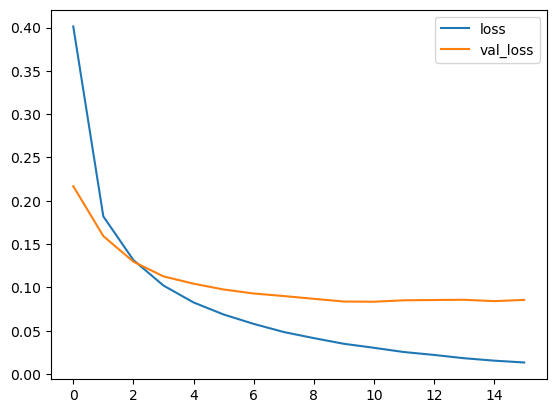

In [22]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

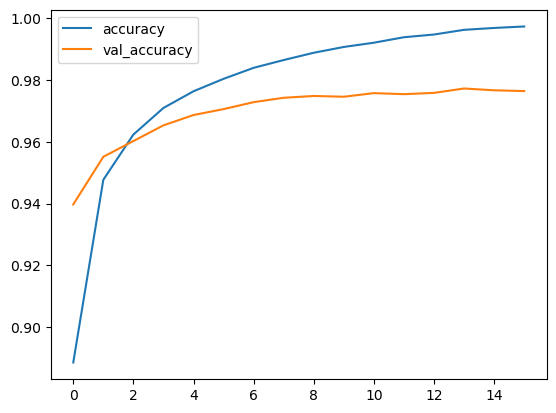

In [23]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [24]:
x_test[0].shape

(28, 28)

In [25]:
model.predict(np.expand_dims(x_test[0], axis=0))[0]

1/1 [==============================] - 0s 134ms/step


array([3.3986229e-08, 6.5513560e-11, 2.9202783e-06, 1.2229742e-03,
       8.1413831e-13, 4.7972115e-10, 5.7105247e-14, 9.9872380e-01,
       7.5754599e-07, 4.9488805e-05], dtype=float32)

## Etapa 9: Predições
Fazemos predições no conjunto de teste e visualizamos os resultados.

- Mostramos as imagens do conjunto de teste com suas predições.
- Indicamos em verde os casos de predição correta e em vermelho os erros.

---

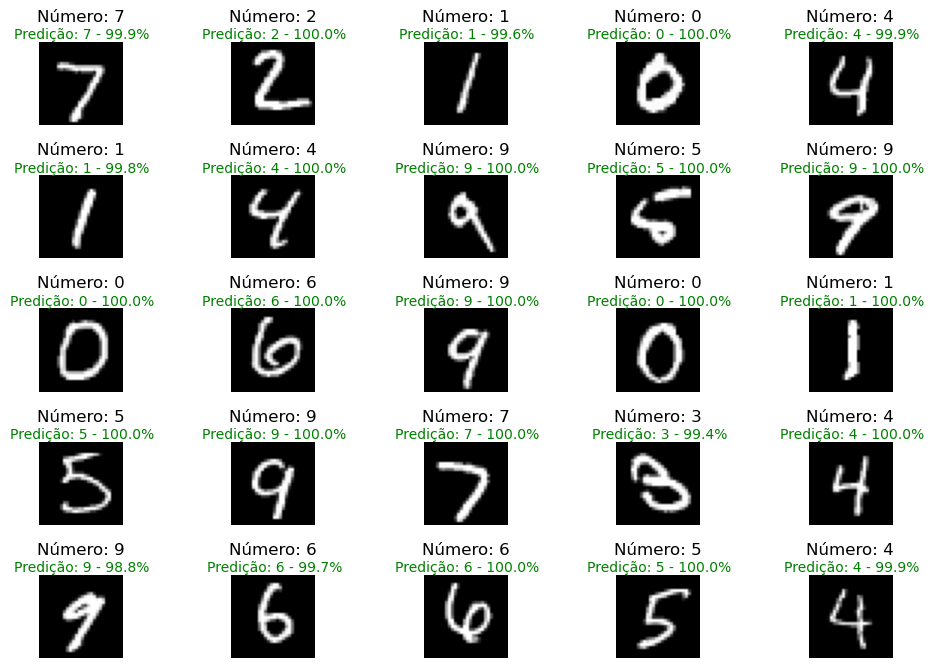

In [26]:
fig, axs = plt.subplots(5, 5, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Número: {y_test[i]}", pad=15)
    ax.axis("off")
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red",
        verticalalignment="center",
        horizontalalignment="center",

        
    )

fig.subplots_adjust(hspace=0.6)

plt.show()

## Etapa 10: Predições com Imagens Externas
Fazemos predições em imagens externas e visualizamos os resultados.

- As imagens externas são invertidas e dimensionadas para o formato 28x28, similar ao MNIST.
- Predições corretas aparecem em verde e incorretas em vermelho.

---

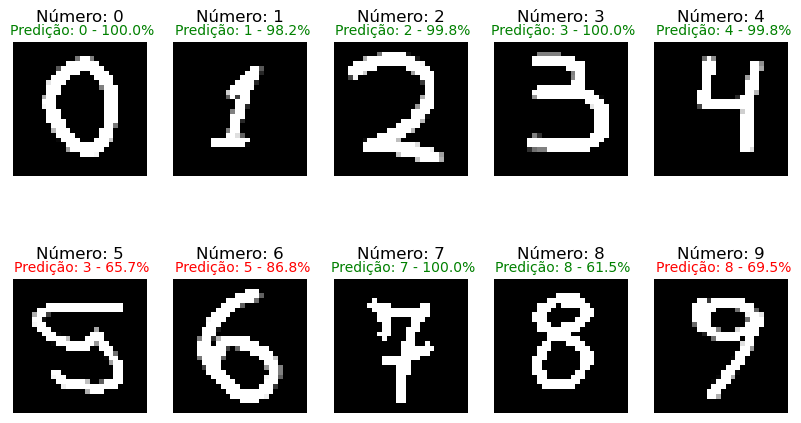

In [27]:
# Caminho para a pasta test_images dentro de PASTA_DADOS
test_images_dir = PASTA_DADOS / "test_images"


if not test_images_dir.exists():
    raise FileNotFoundError(f"A pasta {test_images_dir} não foi encontrada!")

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

all_pred = {}


for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.png")), axs.flat)):
    name = img.name.split(".")[0]
    img = keras.preprocessing.image.load_img(
        img, target_size=(28, 28), color_mode="grayscale"
    )

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = 255 - img_array  # Inverta as cores da imagem
    img_array = tf.expand_dims(img_array, 0)


    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred


    ax.imshow(img_array[0], cmap="gray")
    ax.set_title(f"Número: {name}", pad=15)
    ax.axis("off")
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if str(pred.argmax()) == name else "red",
        verticalalignment="center",
        horizontalalignment="center",
    )

fig.subplots_adjust(hspace=0.6)

plt.show()
